In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg as la
from scipy import random as rnd
from scipy.special import gamma
import matplotlib.pyplot as plt
import cProfile

import bhc

from bhc import helpfncs

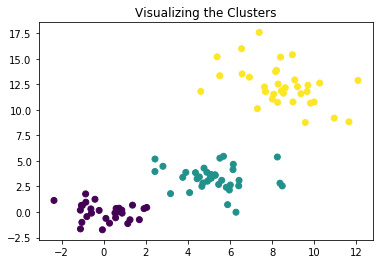

In [2]:
# bivariate gaussian params
mu1 = np.zeros(2)
cov1 = np.eye(2)

mu2 = np.array([5, 3])
cov2 = np.eye(2) * 2

mu3 = np.array([8, 12])
cov3 = np.array([3.4, 0, 0, 5.1]).reshape(2, 2)

# multinom params
p1 = 0.3
p2 = 0.4
p3 = 1 - p2 - p1

# number of total draws
draws = 100


# random draws
rnd.seed(1)

knum = rnd.multinomial(draws, (p1, p2, p3))

gaus1 = rnd.multivariate_normal(mu1, cov1, knum[0])
gaus2 = rnd.multivariate_normal(mu2, cov2, knum[1])
gaus3 = rnd.multivariate_normal(mu3, cov3, knum[2])

# join columns into dataframe
x1 = pd.Series(np.r_[gaus1[:, 0], gaus2[:, 0], gaus3[:, 0]])
x2 = pd.Series(np.r_[gaus1[:, 1], gaus2[:, 1], gaus3[:, 1]])
c = pd.Series(np.r_[np.zeros(knum[0]), np.ones(knum[1]), np.ones(knum[2]) * 2])
dat = {"x1" : x1, "x2" : x2, "c" : c}
clustData = pd.DataFrame(dat)

plt.scatter(clustData["x1"], clustData["x2"], c = clustData["c"])
plt.title("Visualizing the Clusters")
plt.show()

In [8]:
# priors distribution hyper-parameters
gcPriors = {
    "clusterConcentrationPrior" : {"alpha" : 50},
    "diffuseInvWishPrior" : {"df" : 2, "scale" : np.eye(2)}, # inv wishart params
    "diffuseNormPrior" : {"loc" : np.array([1,0]),
                          "scale" : np.eye(2),
                          "meanscale" : 1}, # mvtnormal params
}

gc = clustData.values[:50, :2]
gctree = bhc.HierarchyTree(X = gc, allParams = gcPriors)

In [9]:
cProfile.run("gctree.grow_tree()")

         3644823 function calls in 8.754 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    8.754    8.754 <string>:1(<module>)
    41650    2.312    0.000    7.421    0.000 __init__.py:10(norm_inv_wish_H1)
    20825    0.045    0.000    4.104    0.000 __init__.py:110(posterior_join_k)
    41650    0.114    0.000    7.535    0.000 __init__.py:12(eval_H1)
    20825    0.310    0.000    8.675    0.000 __init__.py:13(__init__)
       49    0.000    0.000    0.011    0.000 __init__.py:14(get_max_posterior)
    20776    0.007    0.000    0.007    0.000 __init__.py:23(<lambda>)
    41650    0.030    0.000    0.030    0.000 __init__.py:42(eval_H2)
       49    0.000    0.000    0.000    0.000 __init__.py:42(update_cluster_list)
    41650    0.187    0.000    0.187    0.000 __init__.py:50(<listcomp>)
    41650    0.018    0.000    0.018    0.000 __init__.py:51(<lambda>)
    41650    0.134    0.000    0.1

In [ ]:
gctree.prune_tree()

In [ ]:
gctree.generate_clust_frame()
plt.scatter("Dim_0", "Dim_1", c = "clustnum", data=gctree.clustDF)
plt.show()

In [5]:
gctree.tree

{0: {0: <bhc.leaf.Leaf at 0x1a1e85a278>,
  1: <bhc.leaf.Leaf at 0x1a1e85a208>,
  2: <bhc.leaf.Leaf at 0x1a1e85a240>,
  3: <bhc.leaf.Leaf at 0x1a1e85a198>,
  4: <bhc.leaf.Leaf at 0x1a1e85a2b0>,
  5: <bhc.leaf.Leaf at 0x1a1e85a2e8>,
  6: <bhc.leaf.Leaf at 0x1a1e85a550>,
  7: <bhc.leaf.Leaf at 0x1a1e85a588>,
  8: <bhc.leaf.Leaf at 0x1a1e85a5f8>,
  9: <bhc.leaf.Leaf at 0x1a1e85a630>,
  10: <bhc.leaf.Leaf at 0x1a1e85a5c0>,
  11: <bhc.leaf.Leaf at 0x1a1e85a390>,
  12: <bhc.leaf.Leaf at 0x1a1e85a400>,
  13: <bhc.leaf.Leaf at 0x1a1e85a438>,
  14: <bhc.leaf.Leaf at 0x1a1e85a3c8>,
  15: <bhc.leaf.Leaf at 0x1a1e85a470>,
  16: <bhc.leaf.Leaf at 0x1a1e85a4e0>,
  17: <bhc.leaf.Leaf at 0x1a1e85a518>,
  18: <bhc.leaf.Leaf at 0x1a1e85a4a8>,
  19: <bhc.leaf.Leaf at 0x1a1e85a320>,
  20: <bhc.leaf.Leaf at 0x1a1e85a358>,
  21: <bhc.leaf.Leaf at 0x1a1e85a668>,
  22: <bhc.leaf.Leaf at 0x1a1e85a6a0>,
  23: <bhc.leaf.Leaf at 0x1a1e85a748>,
  24: <bhc.leaf.Leaf at 0x1a1e85a6d8>,
  25: <bhc.leaf.Leaf at 0x1a1e85

In [6]:
s1 = gctree.tree[5][((((6, 25), (3, 26)), ((15, 20), (10, 11))),
   ((((8, 12), (23, 27)), ((7, 17), (21, 24))),
    (((13, 19), (0, 28)),
     ((5, 9), (14, 22)))))]
s2 = gctree.tree[5][((((38, 48), (34, 37)), ((45, 49), ((4, 18), (1, 29)))),
   ((((30, 32), (33, 41)), ((16, 36), (40, 47))),
    (((31, 39), (42, 43)),
     ((2, 46), (35, 44)))))]

In [7]:
cProfile.run("helpfncs.hypothesis.posterior_join_k(s1, s2)")

         83 function calls in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 __init__.py:10(norm_inv_wish_H1)
        1    0.000    0.000    0.001    0.001 __init__.py:110(posterior_join_k)
        1    0.000    0.000    0.001    0.001 __init__.py:12(eval_H1)
        1    0.000    0.000    0.000    0.000 __init__.py:42(eval_H2)
        1    0.000    0.000    0.000    0.000 __init__.py:50(<listcomp>)
        1    0.000    0.000    0.000    0.000 __init__.py:51(<lambda>)
        1    0.000    0.000    0.000    0.000 __init__.py:52(<listcomp>)
        2    0.000    0.000    0.000    0.000 __init__.py:52(prop_pi_k)
        1    0.000    0.000    0.000    0.000 __init__.py:53(<lambda>)
        1    0.000    0.000    0.001    0.001 __init__.py:82(marginal_clust_k)
        2    0.000    0.000    0.000    0.000 _m